# How to Make Your Own Movie Barcode.

##### - 국제한국학과 20181202 김수미

## 1. What is Movie Barcode? 
'무비 바코드(Movie Barcode)'란 영화의 모든 프레임을 한 장의 이미지로 압축해 마치 바코드처럼 만든 것을 일컫는다.

여러개의 연속된 프레임으로 이루어져 있는 영화를 프레임 별로 분리해, 각 장면의 대표되는 색상으로 그린 수직선을 모아놓은 이미지로

상품의 바코드와 그 모양이 흡사하다. 무비바코드는 영화의 전체적인 색감을 한눈에 볼 수 있어 유용하다.

## 2. Python Code for Creating Movie Barcode

### 1) 코딩 환경 설정하기

코드 실행에 필요한 프로그램들을 불러온다.

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio

### 2) 대표 색상 출력 함수 만들기

동영상 각 프레임의 대표 색상을 구하는 함수를 먼저 만들자. 이 함수를 'getRepColor' 함수라 하겠다.

In [6]:
def getRepColor(image):
    rcenter = image.shape[0]//2
    ccenter = image.shape[1]//2
    #image.shape = (height, width, depth)
    RepColor = image[rcenter, ccenter]
    return RepColor

프레임의 정 중앙에 있는 픽셀의 색을 그 프레임의 대표 색상이라고 정하자.

image는 '(height, width, depth)' 세가지 요소로 이루어져 있다.

### 3) 동영상 불러와 프레임 캡쳐하기

In [7]:
filename = 'TheGrandBudapestHotel.mp4' #영화 '그랜드부다페스트호텔'의 예고편이다.
cap = cv2.VideoCapture(filename) #동영상의 각 프레임을 capture해 'cap'변수에 저장

영화 '그랜드부다페스트호텔'의 예고편을 이용하여 Movie Barcode를 만들어 보겠다. 동영상파일을 코드 안으로 불러온다.

'cv2.VideoCapture()'를 이용하여 'cap'변수에 동영상의 각 프레임 이미지를 저장한다.

In [8]:
CList = []

빈 리스트인 CList를 생성한다. 이 리스트에 이후 각 프레임마다의 RepColor값을 저장할 것이다.

In [10]:
while(True): #For each frame
    ret, frame = cap.read() 
    if ret == False:
        break 

    c = getRepColor(frame) 
    CList.append(c)
    #'getRepColor'함수 이용해 frame의 대표색 출력후 그 값을 Clist에 저장.


캡쳐한 값들의 이미지 값을 변수 frame에 각각 저장해준다. 더이상 프레임이 없을때까지 이 실행을 반복할 수 있는 반복루프 함수를 사용했다.

ret, frame = cap.read() : 비디오를 한 프레임씩 읽는 것.

제대로 프레임을 읽으면, 프레임이 존재하면 ret값이 True, 실패하면 False가 나타난다.

'frame'변수에 읽은 프레임이 입력된다.

### 4) 프레임별로 대표색을 출력하여 리스트에 값 정리하고 윈도우 설정하기

 그 다음 'getRepColor'함수를 이용해 'frame'의 대표색 출력하여 그 값을 c에, 
 
 얻어낸 c 값을 Clist에 저장해 리스트의 내용물을 대표색으로 채워나간다.

In [11]:
cap.release()
a = (len(CList)/5)*2
a = int(a)
img = np.zeros((a,len(CList),3))
#np.zeros 이용해 movie barcode 윈도우의 'height, width, depth' 설정.

cap.release() 연산자를 이용해 오픈한 캡쳐 객체를 해제한다.(brief Closes video file or capturing device)

CList의 길이, 즉 프레임의 수에 따라 가로의 길이가 결정되기 때문에,

항상 세로의 길이가 가로 * 2/5배 정도가 되게 해 윈도우의 모양을 보기좋게, 바코드 처럼 보이게 한다. 

### 5) 바코드 이미지화 하기

In [12]:
for i in range(len(CList)):
    img[:,i] = CList[i]

본격적으로 바코드를 이미지화 하는 단계이다.
for 루프를 사용하여 CList 에 저장된 색상값을 r,g,b에 저장해준다.
r = CList[i][0], g = CList[i][1], b = CList[i][2]
img[:,i] = CList[i] 를 풀어서 쓰면 img[0:400,i] = [r, g, b] 가 된다.
[:] = height 전체를 의미하고 CList[i] = [r, g, b] 를 의미하기 때문이다.

opencv는 'BGR'을 사용하지만, Matplotlib는 'RGB'로 이미지를 보여주기 때문에
cv2.split(image)를 사용해 이미지 파일을 분리한 후, cv2.merge()로 그 순서를 재구성해 b,r의 자리를 바꿔 주어야 한다.

In [23]:
b, g, r = cv2.split(img)   #cv2.split(img)를 사용해 이미지 파일을 분리.
img2 = cv2.merge([r,g,b])  #b,r의 순서를 바꿔서 Merge : rgb 순서로 정렬된 img2 생성.

img2 = img2.astype(np.uint8)

여기서 'img2 = img2.astype(np.uint8)' 수식은 'r,g,b range error'를 고치기위해 사용된 것이다.

In [ ]:
plt.imshow(img2)
plt.show()

그리고 마무리 단계. 과정을 완료하고 이미지를 화면에 송출한다.

여기서 plt라는 용어는 module matplotlib.pyplot 에서 온 것이다.

### 6) 생성된 바코드 이미지 파일로 저장하기

In [ ]:
imageio.imwrite('TheGrandBudapestHotel_MovieBarcode.png', img2)

'imageio.imwrite('TheGrandBudapestHotel_MovieBarcode.png', img2)'수식은 생성된 바코드를 코드가 있는 폴더에

이미지 파일로 자동 저장해 주는 수식이다.

In [17]:
cv2.destroyAllWindows()

cv2.imshow를 사용했으면 마지막에 붙여줘야 하는 수식. 이제 모든 수식이 끝났다.

## 3. The Result of the Code and Utilization.

이미지 파일을 불러오는 코드이다. 마크다운에서 HTML문법을 이용하여 이미지를 업로드 하려니까 자꾸 깨져서 보이지 않길래 코드를 사용하여 이미지를 출력했다.

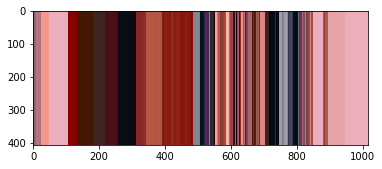

In [11]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

a = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA/gAAAGWCAIAAABD2L/DAAAMmklEQVR42u3WS4glVxnA8e+cqlt9e3q6k86YeURHjEk0g0ETiUhERKL4CIiiBFyI4mOlKIJuXLoQXIgooohEEAISxcfGCIqgSNDEJ2bGoAljopkYk/E1dqdfdc85Lu48OpMMRBSN8Put+hZV1XW/qlvnnz791nfNWl1Z2pvGXLoaEX3fR8Ty0t6IGIZhHMfpdNr3fc45pXTq1KmImC4vjeNYSplOpxsbG7XWNz7v4riwmuIp2tp/7VPdNWr8T93y5tf8m2eoEfkJG7938Mn3mf/xxEN2b5lPJP9HRzbuvSIiUkoXvuTHnbzkiIjcIrWaI593QG6R2uOOKPlxl73nT+vDMNRaI6JFqbW2dvqAM9cQOZ875XxjKeX055Yj1b7v52eY5C6i7uzsnLd/RMx3SLlsbq3dOVwSTyfD1s7KbOt9L3jRZx48sb7+j0uie/eVz2y5pVoucMSZgXTn353cd3VWct/NP066/rwdrr7qGbt/pznnWiPnnNt8zjUiWmvn7kJEKaXruvPvfq2llEhpPuT5nHffqXPSucdwVp/8cTp2x892vzRyFymloetzpFrr2f/epba9udVai8gt1RxpGIYhdRvjWFqdtTRrtda62OVhOh36vu/7+bF1Nm6POzuzWqPVMc1S6qKkND9t7VLuUpe7mqPlqK2mlFuJVqO11koptURprUtdaS1qrbOy+wE7O+0U56aU8q4ZphaRWyunt9TW0uk5tFJrrbnmaCWVVOp2a63LbZryqQ99Yr5PqeN0Op3NZhEx/zotRY5Uo519sHdPflZjHMdPfvGzs83taH10ObeaWkSqrZWWckqppL7rF7tuMtva7qeTI93haZ/6lBdiYXmyZ+ijz93mWNfGje3YLqlEnfaTun9h5cpnTV/w/IO3/uwnjzzySCt1c/Ox3GI66brWrezpuz6tbZbSDY+urf/1sbWcc2tl2i0++vGPRETMZlFKDAtRSqR8/7FjD//poegmW+Msunx61LW21n7y6InFYXL668xqH63r26Tr82xMKS32Q059P8mTVroWNaeb3/felmo981roIkXEOI4REXXI/ert3/r2d+6888DK6mUX7+u2Ni9dXN7e3l5bW1sapvNFcBzHhYXJR3/6w6VJnNgeL+nzkcWL3vDqm7bS8JHbvrRRxprqx975/s9//bb33PDSw5cezC0i1VJKWXvkc3fcMVz14ueuPXzlwuyml90wRr3iiis217b7Li2m/nt33fXFH3z/gze+YmO2M11YWbr08KGLFr/xaPvaXXc9Y0h7Ln1Ol9va1t8vWTk0DEMfs1ctPe7FdSFf+u6ttdbWptcvX5RyGet4bG2jTYatWdqzuHDqH+uvf/XLL967GFGXl5eP//6PP/rNb69/7uXPvuzA0tLC8QcevOcPD338TW/7V99UH/jyLX+rXY1Ud8acc408v9TWWkt1rCUiyqFr7v7lzyd1FlFbKxHRcheTLtVUUs6lRURNOXU550ip2+7qzddcc/XB/d/81bF7f39/2vUiyLsWoE996gsPP/CHy646fPze+44cOVLPyDmXUkopDz344MbGRkQcOHBodXX16NGjL7z2hRvrG+sb6/v27Vvcs9ClNP+ZbG1tnTx58qtf+W6ts66bRD85uP/AYztb29tjn2JY6FdXVxeGevLk32qJWmN1dfXEQw/8+e+njv/xNxeaTOryrpUu3n7dDa+98XX3PHD8l0fvmU6H7Y3NSbe10xaHvauPlS7n3EWadH3X6jues9h13V9qf/df1qOWiNg71rfdeN0vfvHrw4f233P/746u3Xf2tH3UWa2ryysL/WT+1m2tveXqV57d4fYffmfloj3zJbJ2LWrbaeXmd374yZePqF1MZim3NF+mnzQ3LrD0nPHj2z524tTGs1b23v/Xk5fv2/fEJfusl7zhXfN7e/bF+N8Mv90/qFTPv4DJnqeeBDme9v4PLhEAABD6AACA0AcAAKEPAAAIfQAAQOgDAABCHwAAEPoAACD0AQAAoQ8AAAh9AABA6AMAAEIfAAAQ+gAAIPQBAAChDwAACH0AAEDoAwAAQh8AAIQ+AAAg9AEAAKEPAAAIfQAAQOgDAIDQNwIAABD6AACA0AcAAIQ+AAAg9AEAAKEPAABCHwAAEPoAAIDQBwAAhD4AACD0AQBA6AMAAEIfAAAQ+gAAgNAHAACEPgAAIPQBAEDoAwAAQh8AABD6AACA0AcAAIQ+AAAIfQAAQOgDAABCHwAAEPoAAIDQBwAAhD4AAAh9AABA6AMAAEIfAAAQ+gAAgNAHAAChDwAACH0AAEDoAwAAQh8AABD6AACA0AcAAKEPAAAIfQAAQOgDAABCHwAAEPoAACD0AQAAoQ8AAAh9AABA6AMAAEIfAAAQ+gAAIPQBAAChDwAACH0AAEDoAwAAQh8AAIQ+AAAg9AEAAKEPAAAIfQAAQOgDAABCHwAAhD4AACD0AQAAoQ8AAAh9AABA6AMAgNAHAACEPgAAIPQBAAChDwAACH0AAEDoAwCA0AcAAIQ+AAAg9AEAAKEPAAAIfQAAEPoAAIDQBwAAhD4AACD0AQAAoQ8AAAh9AAAQ+gAAgNAHAACEPgAAIPQBAAChDwAAQh8AABD6AACA0AcAAIQ+AAAg9AEAAKEPAABCHwAAEPoAAIDQBwAAhD4AACD0AQBA6AMAAEIfAAAQ+gAAgNAHAACEPgAAIPQBAEDoAwAAQh8AABD6AACA0AcAAIQ+AAAIfQAAQOgDAABCHwAAEPoAAIDQBwAAhD4AAAh9AABA6AMAAEIfAAAQ+gAAgNAHAAChDwAACH0AAEDoAwAAQh8AABD6AACA0AcAAKEPAAAIfQAAQOgDAABCHwAAEPoAACD0AQAAoQ8AAAh9AABA6AMAAEIfAAAQ+gAAIPQBAAChDwAACH0AAEDoAwAAQh8AAIQ+AAAg9AEAAKEPAAAIfQAAQOgDAABCHwAAhD4AACD0AQAAoQ8AAAh9AABA6AMAgNAHAACEPgAAIPQBAAChDwAACH0AAEDoAwCA0AcAAIQ+AAAg9AEAAKEPAAAIfQAAEPoAAIDQBwAAhD4AACD0AQAAoQ8AAAh9AAAQ+gAAgNAHAACEPgAAIPQBAAChDwAAQh8AABD6AACA0AcAAIQ+AAAg9AEAAKEPAABCHwAAEPoAAIDQBwAAhD4AACD0AQBA6AMAAEIfAAAQ+gAAgNAHAACEPgAAIPQBAEDoAwAAQh8AABD6AACA0AcAAIQ+AAAIfQAAQOgDAABCHwAAEPoAAIDQBwAAhD4AAAh9AABA6AMAAEIfAAAQ+gAAgNAHAAChDwAACH0AAEDoAwAAQh8AABD6AACA0AcAAKEPAAAIfQAAQOgDAABCHwAAEPoAACD0AQAAoQ8AAAh9AABA6AMAAEIfAAAQ+gAAIPQBAAChDwAACH0AAEDoAwAAQh8AAIQ+AAAg9AEAAKEPAAAIfQAAQOgDAABCHwAAhD4AACD0AQAAoQ8AAAh9AABA6AMAgNAHAACEPgAAIPQBAAChDwAACH0AAEDoAwCA0AcAAIQ+AAAg9AEAAKEPAAAIfQAAEPoAAIDQBwAAhD4AACD0AQAAoQ8AAELfCAAAQOgDAABCHwAAEPoAAIDQBwAAhD4AAAh9AABA6AMAAEIfAAAQ+gAAgNAHAAChDwAACH0AAEDoAwAAQh8AABD6AACA0AcAAKEPAAAIfQAAQOgDAABCHwAAEPoAACD0AQAAoQ8AAAh9AABA6AMAAEIfAAAQ+gAAIPQBAAChDwAACH0AAEDoAwAAQh8AAIQ+AAAg9AEAAKEPAAAIfQAAQOgDAABCHwAAhD4AACD0AQAAoQ8AAAh9AABA6AMAgNAHAACEPgAAIPQBAAChDwAACH0AAEDoAwCA0AcAAIQ+AAAg9AEAAKEPAAAIfQAAEPoAAIDQBwAAhD4AACD0AQAAoQ8AAAh9AAAQ+gAAgNAHAACEPgAAIPQBAAChDwAAQh8AABD6AACA0AcAAIQ+AAAg9AEAAKEPAABCHwAAEPoAAIDQBwAAhD4AACD0AQBA6AMAAEIfAAAQ+gAAgNAHAACEPgAAIPQBAEDoAwAAQh8AABD6AACA0AcAAIQ+AAAIfQAAQOgDAABCHwAAEPoAAIDQBwAAhD4AAAh9AABA6AMAAEIfAAAQ+gAAgNAHAAChDwAACH0AAEDoAwAAQh8AABD6AACA0AcAAKEPAAAIfQAAQOgDAABCHwAAEPoAACD0AQAAoQ8AAAh9AABA6AMAAEIfAAAQ+gAAIPQBAAChDwAACH0AAEDoAwAAQh8AAIQ+AAAg9AEAgKerfwJS6ZWex3bvFAAAAABJRU5ErkJggg=='

img = imread(a)
plt.imshow(img)
plt.show()

- '그랜드부다페스트 호텔' 예고편 영상의 전체적인 핑크빛 색감을 한눈에 볼 수 있다. 

이와 같이 코드를 완성하였기 때문에, 이제 사용자는 무비 바코드로 변환하고 싶은 영상만 있다면 바코드를 생성할 수 있다.

이 코드를 이용하면 어떠한 mp4 영상자료도 하나의 이미지로 재구성 할 수 있다.
